In [1]:
import pandas as pd
import numpy as np

# Number of samples
n_samples = 200

# General features (first 10 remain the same)
general_features = [
    'Energy_Level', 'Mood', 'Appetite', 'Sleep_Quality', 'Digestion',
    'Stress_Level', 'Concentration', 'Physical_Activity', 'Hydration', 'Mood_Swings'
]

# Raktamokshana-specific features (Pitta-focused)
# Typical clinical indicators: skin redness, body heat, acidity, bleeding tendency, inflammation
raktamokshana_features = [
    'Skin_Redness',      # degree of redness in skin
    'Body_Heat',         # perception of heat
    'Acidity',           # stomach acidity
    'Bleeding_Tendency', # nose/gum bleeding
    'Inflammation'       # local inflammation or rashes
]

all_features = general_features + raktamokshana_features + [
    'Body_Temperature', 'Metabolism', 'Immunity', 'Thirst_Level', 'Flexibility'
]

# Define categories for all features
categories = {
    'Energy_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood': ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    'Appetite': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Sleep_Quality': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Digestion': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Stress_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Concentration': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Physical_Activity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Hydration': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood_Swings': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Skin_Redness': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    'Body_Heat': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Acidity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Bleeding_Tendency': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    'Inflammation': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
}

# Score map for numeric calculation
score_map = {
    'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5,
    'Very Sad': 1, 'Sad': 2, 'Neutral': 3, 'Happy': 4, 'Very Happy': 5,
    'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5,
    'Very Cold': 1, 'Cold': 2, 'Normal': 3, 'Warm': 4, 'Hot': 5,
    'Very Slow': 1, 'Slow': 2, 'Moderate': 3, 'Fast': 4, 'Very Fast': 5,
    'Very Weak': 1, 'Weak': 2, 'Average': 3, 'Strong': 4, 'Very Strong': 5,
    'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4, 'Very Severe': 5
}

# Generate synthetic dataset
data = {}
for feature, cats in categories.items():
    data[feature] = np.random.choice(cats, n_samples)

df = pd.DataFrame(data)

# Calculate realistic Pitta levels (high body heat, acidity, bleeding, redness → high Pitta)
def calculate_pitta(row):
    factors = [
        score_map[row['Skin_Redness']],
        score_map[row['Body_Heat']],
        score_map[row['Acidity']],
        score_map[row['Bleeding_Tendency']],
        score_map[row['Inflammation']]
    ]
    pitta_percent = (sum(factors) / (len(factors)*5)) * 100  # Normalize to 0-100%
    return round(pitta_percent, 1)

# Calculate realistic overall improvement (higher energy, digestion, sleep, immunity → better improvement)
def calculate_improvement(row):
    factors = [
        score_map[row['Energy_Level']],
        score_map[row['Appetite']],
        score_map[row['Digestion']],
        score_map[row['Sleep_Quality']],
    ]
    improvement_percent = (sum(factors) / (len(factors)*5)) * 100
    return round(improvement_percent, 1)

df['Pitta_Level'] = df.apply(calculate_pitta, axis=1)
df['Overall_Improvement'] = df.apply(calculate_improvement, axis=1)

df.to_excel('Raktamokshana_Feedback_Synthetic.xlsx', index=False)
print(df.head(10))


  Energy_Level        Mood   Appetite Sleep_Quality  Digestion Stress_Level  \
0    Very High       Happy       High          Poor  Excellent     Moderate   
1         High       Happy        Low       Average       Good         High   
2    Very High         Sad   Very Low     Very Poor       Good    Very High   
3          Low       Happy   Very Low     Excellent       Poor     Very Low   
4         High         Sad   Very Low     Excellent    Average    Very High   
5          Low       Happy   Moderate     Excellent    Average          Low   
6     Very Low         Sad        Low     Excellent    Average          Low   
7     Very Low  Very Happy   Moderate       Average    Average         High   
8         High    Very Sad        Low          Good  Very Poor     Moderate   
9          Low       Happy  Very High     Excellent  Excellent     Very Low   

  Concentration Physical_Activity  Hydration Mood_Swings Skin_Redness  \
0     Excellent          Moderate   Very Low    Moderate 

In [2]:
import pandas as pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import pickle

In [3]:
df

,Energy_Level,Mood,Appetite,Sleep_Quality,Digestion,Stress_Level,Concentration,Physical_Activity,Hydration,Mood_Swings,Skin_Redness,Body_Heat,Acidity,Bleeding_Tendency,Inflammation,Pitta_Level,Overall_Improvement
0,Very High,Happy,High,Poor,Excellent,Moderate,Excellent,Moderate,Very Low,Moderate,Very Severe,Very Low,High,None,Moderate,56.0,80.0
1,High,Happy,Low,Average,Good,High,Excellent,High,Very Low,Low,Moderate,Very High,Moderate,Moderate,Very Severe,76.0,65.0
2,Very High,Sad,Very Low,Very Poor,Good,Very High,Average,Low,High,Very Low,Mild,High,Very Low,Very Severe,Mild,56.0,55.0
3,Low,Happy,Very Low,Excellent,Poor,Very Low,Average,Low,Moderate,Low,Mild,Low,Very High,None,Mild,48.0,50.0
4,High,Sad,Very Low,Excellent,Average,Very High,Average,Low,High,Very High,None,Very Low,Low,Moderate,None,32.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Very Low,Sad,Moderate,Poor,Very Poor,Low,Very Poor,Very Low,Very Low,Low,Mild,Moderate,Low,Severe,Mild,52.0,35.0
196,Moderate,Very Happy,Very Low,Very Poor,Very Poor,Low,Good,High,Very Low,Very High,Moderate,Very Low,Moderate,Mild,Very Severe,56.0,30.0
197,Very Low,Happy,Very High,Very Poor,Excellent,High,Excellent,Very High,High,Very Low,Severe,Very Low,Low,Very Severe,None,52.0,60.0
198,Very High,Sad,Low,Good,Excellent,High,Excellent,Moderate,High,Very Low,None,High,High,Severe,Moderate,64.0,80.0


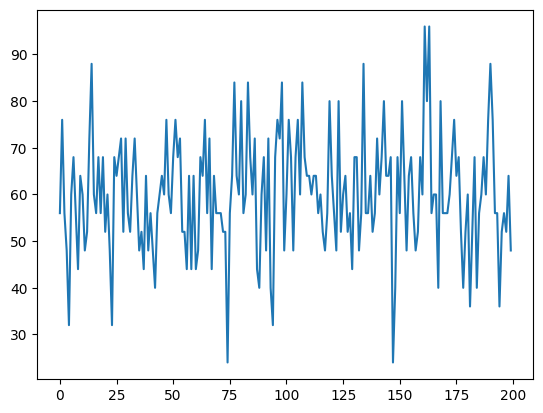

In [4]:
 plt.plot(df['Pitta_Level'])

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Energy_Level         200 non-null    object 
 1   Mood                 200 non-null    object 
 2   Appetite             200 non-null    object 
 3   Sleep_Quality        200 non-null    object 
 4   Digestion            200 non-null    object 
 5   Stress_Level         200 non-null    object 
 6   Concentration        200 non-null    object 
 7   Physical_Activity    200 non-null    object 
 8   Hydration            200 non-null    object 
 9   Mood_Swings          200 non-null    object 
 10  Skin_Redness         200 non-null    object 
 11  Body_Heat            200 non-null    object 
 12  Acidity              200 non-null    object 
 13  Bleeding_Tendency    200 non-null    object 
 14  Inflammation         200 non-null    object 
 15  Pitta_Level          200 non-null    flo

In [6]:
features = [col for col in df.columns if df[col].dtype == 'object']
target = [col for col in df.columns if df[col].dtype == 'float64']

order_map = {
    # General features (first 10)
    "Energy_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood": ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    "Appetite": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Sleep_Quality": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Digestion": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Stress_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Concentration": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Physical_Activity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Hydration": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood_Swings": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],

    # Raktamokshana-specific Pitta features
    "Skin_Redness": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    "Body_Heat": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Acidity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Bleeding_Tendency": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    "Inflammation": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],

}

categories_list = [order_map[col] for col in features]


In [7]:
preprocessor=ColumnTransformer([('OrdinalEncoder',OrdinalEncoder(categories=categories_list),features)
])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],test_size=0.2)

In [9]:
model=MultiOutputRegressor( XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
))


In [10]:
final_pipeline=Pipeline([('preprocessor',preprocessor),
                        ('XGB_model',model)])

In [11]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Sad',
                                                                              'Sad',
                                                                              'Neutral',
                                                                              'Happy',
                                                                              'Very '
                                                                              'Happy'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Excellent'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good...
                                                             feature_weights=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.05,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=na

In [12]:
y_pred=final_pipeline.predict(X_test)

In [13]:
y_pred

array([[60.036343, 61.902855],
       [63.78411 , 51.415627],
       [68.76285 , 65.278336],
       [75.0952  , 48.27194 ],
       [85.05953 , 46.932568],
       [64.61867 , 65.06784 ],
       [51.183006, 76.86263 ],
       [61.085617, 62.872707],
       [55.6864  , 59.919903],
       [48.681248, 40.092323],
       [65.93743 , 53.687252],
       [54.626667, 70.70986 ],
       [77.682846, 57.473286],
       [64.32643 , 76.39068 ],
       [66.918106, 60.02164 ],
       [88.60789 , 48.349163],
       [64.062965, 55.798206],
       [55.957085, 65.37689 ],
       [63.29956 , 71.71842 ],
       [59.660652, 54.033897],
       [47.003418, 73.06228 ],
       [63.508583, 70.14611 ],
       [64.77199 , 48.86959 ],
       [54.662983, 55.766453],
       [28.76974 , 67.66357 ],
       [65.18135 , 46.44461 ],
       [47.86224 , 65.60163 ],
       [75.81599 , 66.71085 ],
       [63.1499  , 43.157505],
       [46.4471  , 59.12303 ],
       [62.33849 , 50.435295],
       [61.24447 , 77.03148 ],
       [

In [16]:
with open('Raktamokshana_model.pkl','wb') as f:
    pickle.dump(final_pipeline,f)